In [586]:
from importlib import reload
import gas_utils
reload(gas_utils)
from gas_utils import *


In [587]:

A0 = torch.tensor([[1.0]])

dq = torch.tensor([50.0])
Bd = torch.tensor([[1.0]])

sp = torch.tensor([50.0])
Bs = torch.tensor([[1.0]])

d = torch.ones(A0.shape[1])     # diameters
L = 1200.0 * torch.ones(A0.shape[1]) # pipe lengths
hR = 50 * torch.ones(A0.shape[1]) # pipe start height
hL = torch.zeros(A0.shape[1]) # pipe end height
lambda0 = torch.ones(A0.shape[1]) # friction factor of pipes 


In [588]:
model_params = {
    'A0': A0,
    'sp' : sp,
    'Bs' : Bs,
    'dq' : dq,
    'Bd' : Bd,
    'd': d,
    'L': L,
    'hR': hR,
    'hL': hL,
    'a' : 1200.0,
    'f' : 0.045,
    'T_max' : 1.0, 
    'Kl_max' : 0.0,
    'n_samples' : 1
}

net_params = {
     'K' : 1,
     'layer_sizes_trunk' : [1, 42, 42, 42], 
     'layer_sizes_branch': [1, 42, 42, 42], 
     'activation' : 'relu',
}

In [589]:
model = Model(model_params, net_params)
model.train(iterations=10000, print_interval=100)

step       loss       e1          e2
100        4.30e+10   4.30e+10   2.12e+03        New Best!
200        3.05e+05   3.04e+05   1.33e+03        
300        9.86e+02   2.51e+01   9.61e+02        New Best!
400        9.10e+02   2.21e+02   6.89e+02        New Best!
500        6.59e+02   1.75e+02   4.85e+02        New Best!
600        1.23e+03   8.99e+02   3.33e+02        
700        3.65e+02   1.41e+02   2.24e+02        New Best!
800        2.12e+02   6.67e+01   1.46e+02        New Best!
900        2.75e+02   1.83e+02   9.18e+01        
1000       9.24e+01   3.65e+01   5.59e+01        New Best!
1100       6.93e+01   3.64e+01   3.28e+01        
1200       1.96e+01   1.04e+00   1.85e+01        New Best!
1300       4.00e+01   3.00e+01   1.00e+01        
1400       1.15e+02   1.10e+02   5.21e+00        
1500       5.83e+02   5.81e+02   2.58e+00        
1600       1.47e+02   1.46e+02   1.22e+00        
1700       2.57e+02   2.57e+02   5.49e-01        
1800       9.43e+00   9.20e+00   2.34e-01

torch.Size([100, 1])
torch.Size([1, 1])
tensor([[15.0768]], grad_fn=<SelectBackward0>)


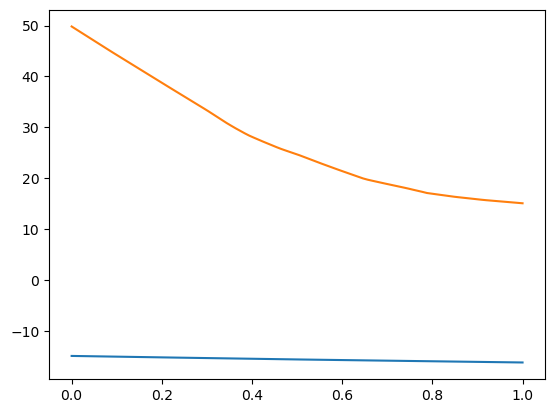

In [ ]:
t = torch.zer(0, 1, 100).reshape(-1, 1)

print(t.shape)

param = torch.zeros((1, 1))

print(param.shape)

p = model.pnet(t, param)
q = model.qnet(t, param)

print(q[-1,...])


plt.plot(t, p[:,0,0].detach())
plt.plot(t, q[:,0,0].detach())